We want to analyse a set of handwritted digits, using multiple learning methods. First, we start by collecting the dataset:

In [1]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


We can read its description by doing:

In [3]:
#print(digits.DESCR)

We find that the data is an 8x8 pixel matrix where each pixel has a value between 0 and 16. They basically represent our handwritten digits in low res. We can plot a few of them:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

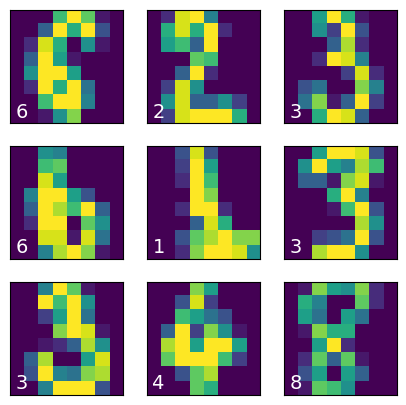

In [12]:
fig, axes = plt.subplots(3, 3, figsize = (5, 5))
#print(digits.images.shape[0])
image_n = np.random.choice(digits.images.shape[0], 100) #Generates a random sample from a given 1-D array -> 100 rnd values from our 1797 digits

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[image_n[i]]) #printing the image
    ax.text(0.05, 0.05, str(digits.target[image_n[i]]),transform=ax.transAxes, color='white', fontsize=14) #printing the true digit
    ax.set_xticks([]) #hiding axes values
    ax.set_yticks([])

plt.show()

And our data will have the following shape:

In [79]:
print(digits.data[0])
print(digits.data.shape)
print(digits.images.shape)
print(digits.images[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
(1797, 64)
(1797, 8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


which are the values of each pixel. We already know that sklearn want the data as a column array (1764, N) and the targets as a row (N, ).

In [31]:
X = digits.data
y = digits.target

## 1. Unsupervised Learning: Dimensionality Reduction on Digits

We will use Isomap, which tries to reduce the dimensionality of the problem, which in our case is 64!

    class sklearn.manifold.Isomap(*, n_neighbors=5, radius=None, n_components=2, eigen_solver='auto', tol=0, max_iter=None, path_method='auto', neighbors_algorithm='auto', n_jobs=None, metric='minkowski', p=2, metric_params=None)[source]

Let's start by reducing our manifold to 2 dimensions.

In [96]:
from sklearn.manifold import Isomap

In [97]:
isomap = Isomap(n_components = 2)
isomap.fit(X)

C:\Users\lm101\anaconda3\envs\pymc_env\Lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\lm101\anaconda3\envs\pymc_env\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Isomap()

In [113]:
X_transformed = isomap.transform(X[:100])
print(X_transformed.shape)

(100, 2)


This means that we took the first 100 digits using 49 components instead of 64.

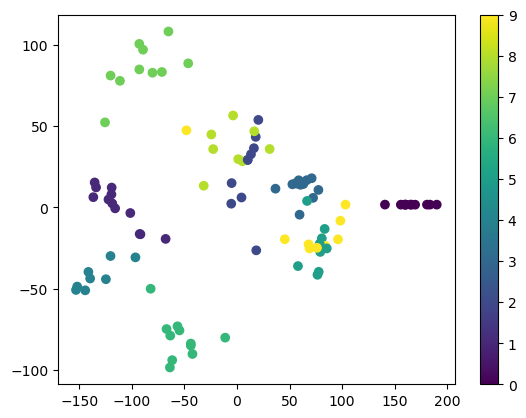

In [114]:
true_value = digits.target[:100]
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c = true_value)
plt.colorbar()

let's see what happens if we change the number of neighbours

In [120]:
isomap20 = Isomap(n_neighbors = 20, n_components = 2)
isomap20.fit(X)
X_t_20 = isomap20.transform(X[:100])

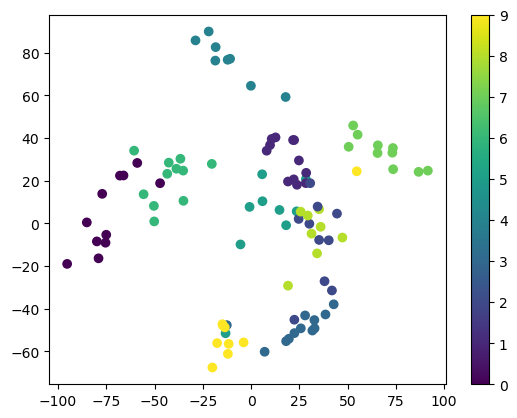

In [121]:
plt.scatter(X_t_20[:, 0], X_t_20[:, 1], c = true_value)
plt.colorbar()

## 2. Supervised Learning: Classification on Digits

We first split the dataset: we will use 80% of it as training data and the rest as a test.

In [122]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [127]:
print(X_train.shape, X_test.shape)

(1437, 64) (360, 64)


Now we will use a Logistic Regression to classificate our data, using  the flag solver='sag', which is the algorith used in the optimization problem.

    class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
logistic_reg = LogisticRegression(solver='sag')

In [130]:
logistic_reg.fit(X_train, y_train)

C:\Users\lm101\anaconda3\envs\pymc_env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='sag')

In [144]:
y_predict_test = logistic_reg.predict(X_test)
y_predict_train = logistic_reg.predict(X_train)

In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [146]:
print('accuracy score of validation set: ', accuracy_score(y_test, y_predict_test))
print('accuracy score of training set: ', accuracy_score(y_train, y_predict_train))

accuracy score of validation set:  0.9611111111111111
accuracy score of training set:  1.0


In [153]:
val_matrix =  confusion_matrix(y_test, y_predict_test)
print('validation set confusion matrix\n', val_matrix)

validation set confusion matrix
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  1]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  1  0]
 [ 1  0  0  0 43  0  0  0  0  0]
 [ 0  0  0  0  0 43  1  0  0  0]
 [ 0  0  0  0  0  1 25  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  5  0  0  0  1  0  0 31  0]
 [ 0  0  0  1  0  0  0  0  2 32]]


In [150]:
print('training set confusion matrix\n', confusion_matrix(y_train, y_predict_train))

training set confusion matrix
 [[145   0   0   0   0   0   0   0   0   0]
 [  0 143   0   0   0   0   0   0   0   0]
 [  0   0 141   0   0   0   0   0   0   0]
 [  0   0   0 153   0   0   0   0   0   0]
 [  0   0   0   0 137   0   0   0   0   0]
 [  0   0   0   0   0 138   0   0   0   0]
 [  0   0   0   0   0   0 155   0   0   0]
 [  0   0   0   0   0   0   0 143   0   0]
 [  0   0   0   0   0   0   0   0 137   0]
 [  0   0   0   0   0   0   0   0   0 145]]


What do these matrices mean? The numbers on the diagonal are the numbers of digits correctly identified for each value, every off-diagonal element is an error! Like we expected, each training data is correctly identified (which is in agreement to our accuracy score equal to 1) while there are some mistakes in the validation set. We can find which number has the most mistakes:

In [193]:
n_errors = np.zeros(10)
for i in range(10):
    for j in range(10):
        if i!=j and val_matrix[i][j] != 0: n_errors[i] += val_matrix[i][j]

In [194]:
print(n_errors)

[0. 1. 0. 1. 1. 1. 1. 0. 6. 3.]


Meaning the hardest number to identify is 8, followed by 9.